In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the CSV file
df = pd.read_csv("spotify_data.csv", index_col=0)


In [97]:
print(df.columns.tolist())
# Create a sub-dataframe without specific columns
sub_df = df.drop(columns=['artist_name', 'track_name', 'track_id', 'genre'])

# Display the first few rows of the new dataframe
print(sub_df.head())


['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
   popularity  year  danceability  energy  key  loudness  mode  speechiness  \
0          68  2012         0.483   0.303    4   -10.058     1       0.0429   
1          50  2012         0.572   0.454    3   -10.286     1       0.0258   
2          57  2012         0.409   0.234    3   -13.711     1       0.0323   
3          58  2012         0.392   0.251   10    -9.845     1       0.0363   
4          54  2012         0.430   0.791    6    -5.419     0       0.0302   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.6940          0.000000    0.1150    0.139  133.406       240166   
1        0.4770          0.000014    0.0974    0.515  140.182       216387   
2        0.3380          0.000050    0.0895    0.

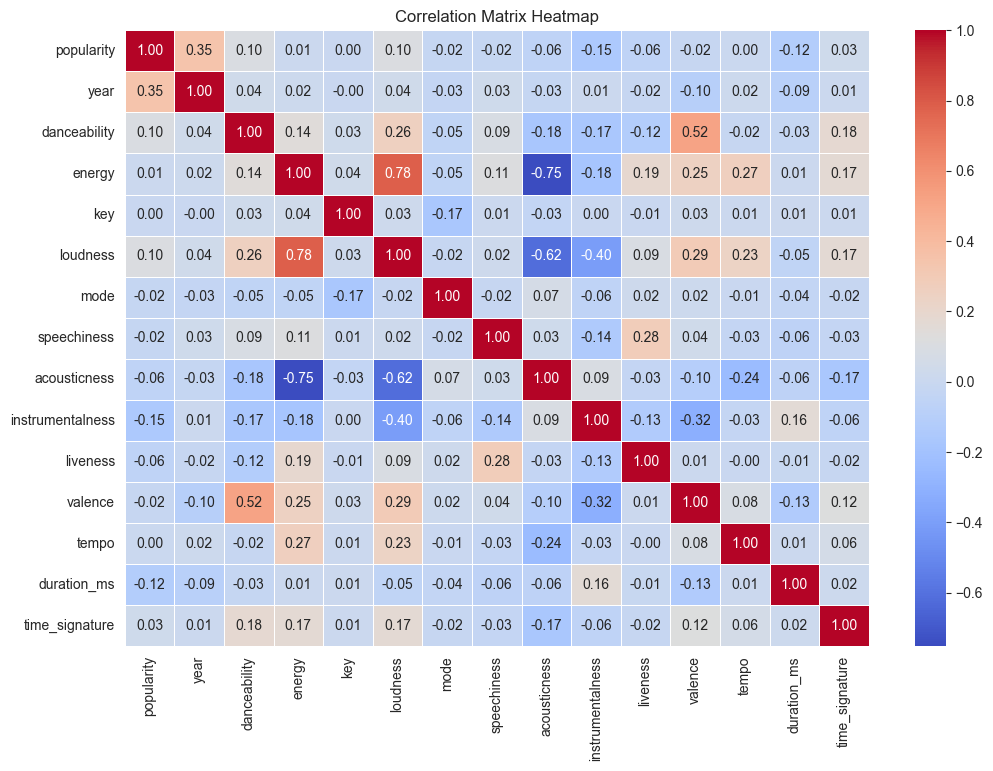

In [98]:
# make sure we only have number in this sub df by include number, although dropping 4 attributes above is enough
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()



Looking at the graph, energy and loudness has a strong correlation, so we drop energy to reduce dimension.

In [99]:
df = pd.read_csv("spotify_data.csv", index_col=0)
df = df[df['popularity'] >= 80] # was modified for >= 80 popularity, originaly used whole dataset
reduced_df = sub_df = df.drop(columns=['track_name', 'track_id', 'energy'])


In [100]:
features = [ 'year', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [101]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
X = sub_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### finding the optimal k cluster using elbow method
##### Use Elbow Method
##### Using Sihouette Score Method

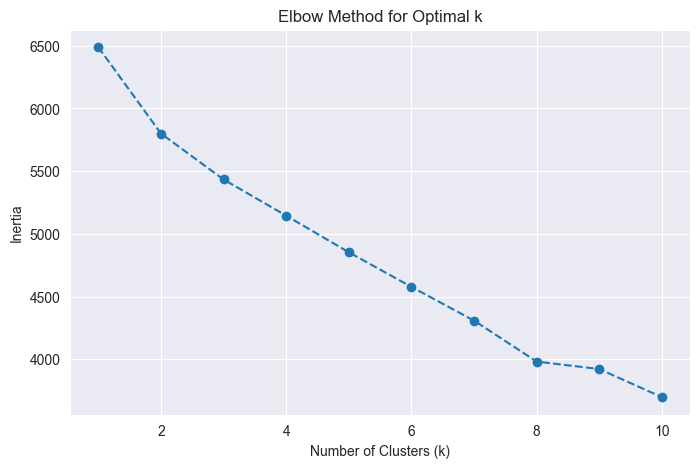

In [102]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


##### Caution, sil score runs slow if dataset is large

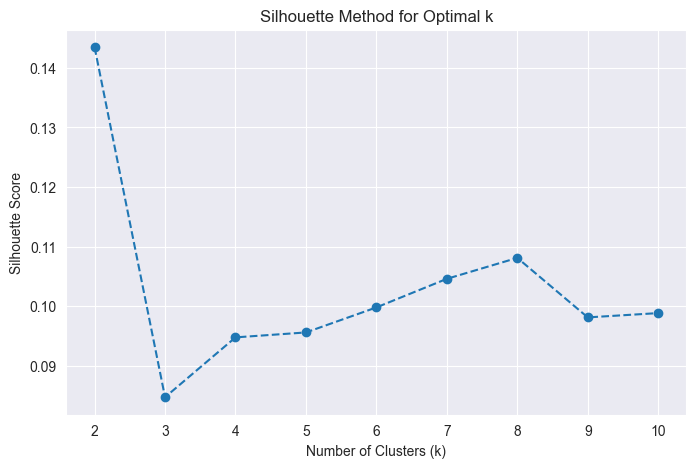

In [104]:

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


Based on elbow method, best k is 3


In [106]:
optimal_k = 3 # Example, select based on elbow method or silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sub_df['Cluster'] = kmeans.fit_predict(X_scaled)

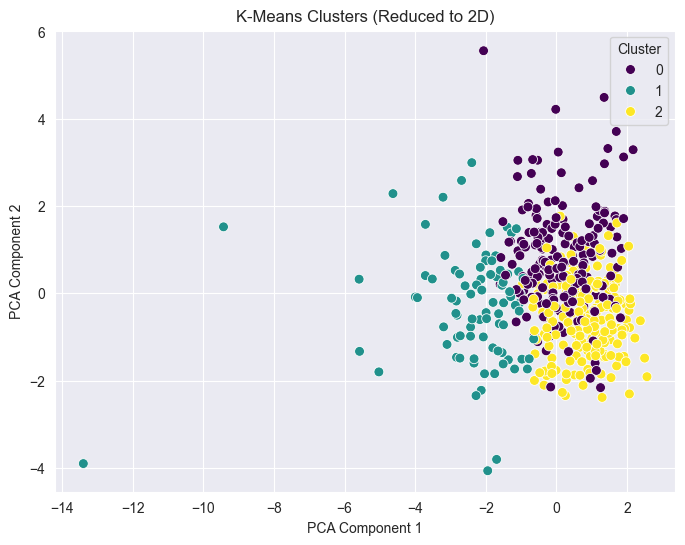

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=sub_df['Cluster'], palette='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (Reduced to 2D)')
plt.legend(title="Cluster")
plt.show()

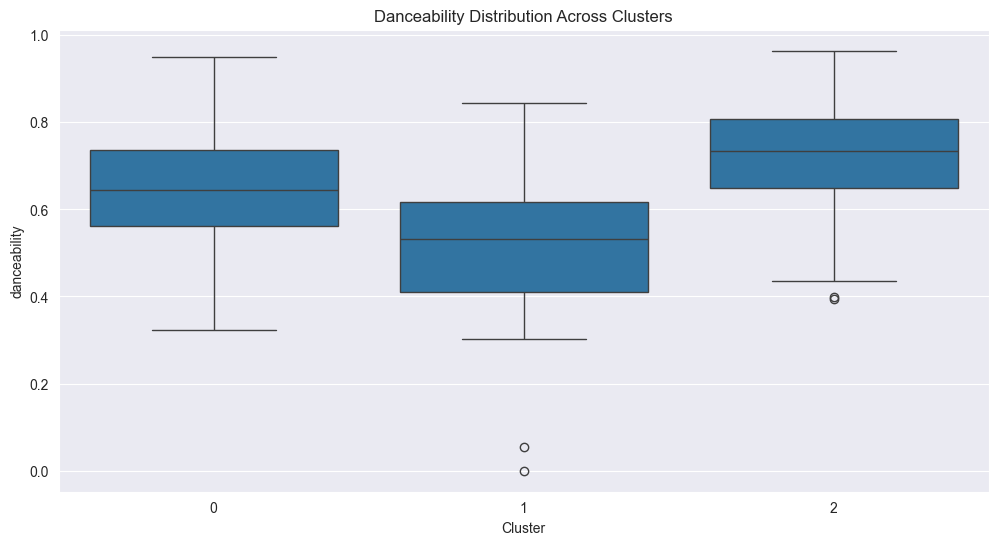

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["danceability"])
plt.title("Danceability Distribution Across Clusters")
plt.show()


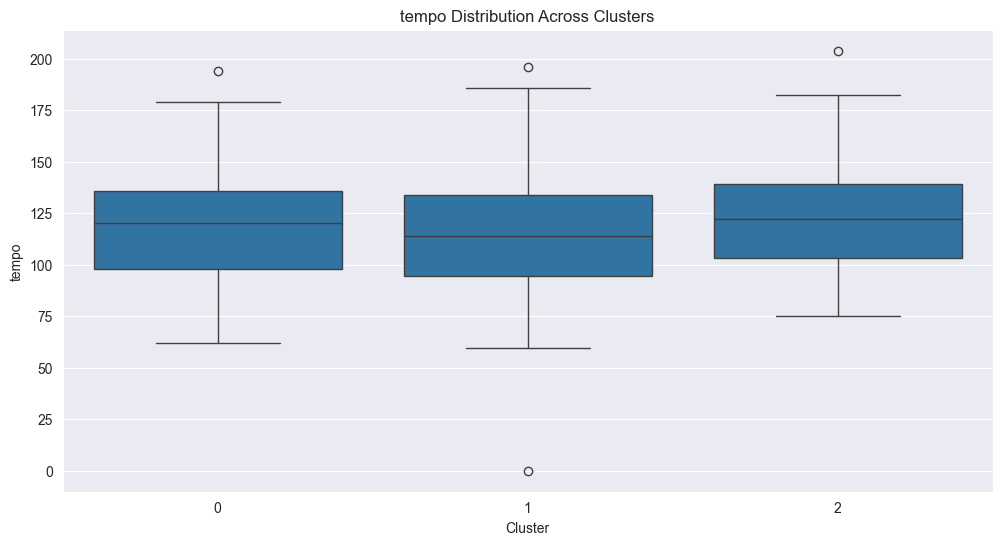

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["tempo"])
plt.title("tempo Distribution Across Clusters")
plt.show()


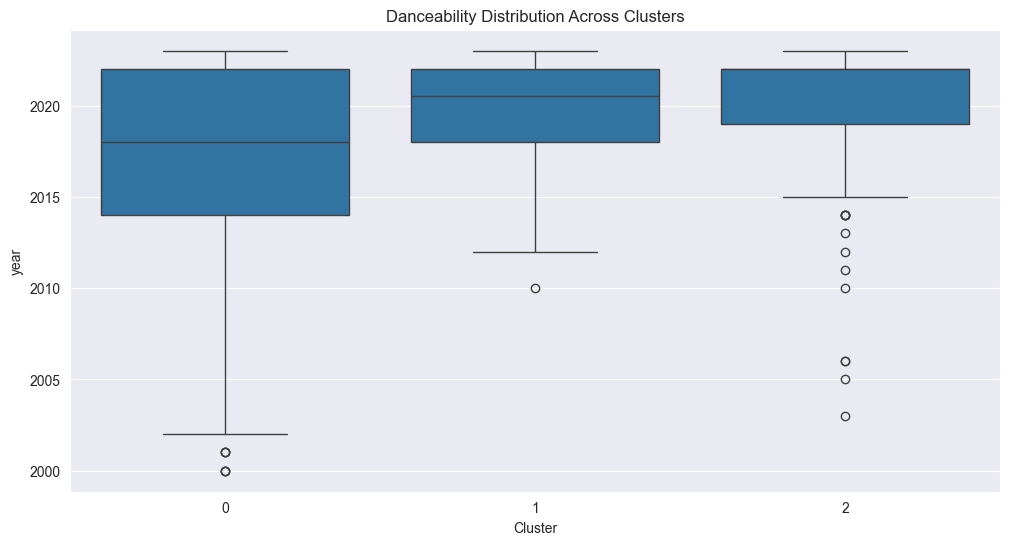

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["year"])
plt.title("Danceability Distribution Across Clusters")
plt.show()


Text(0.5, 1.0, 'tempo Distribution Across Clusters')

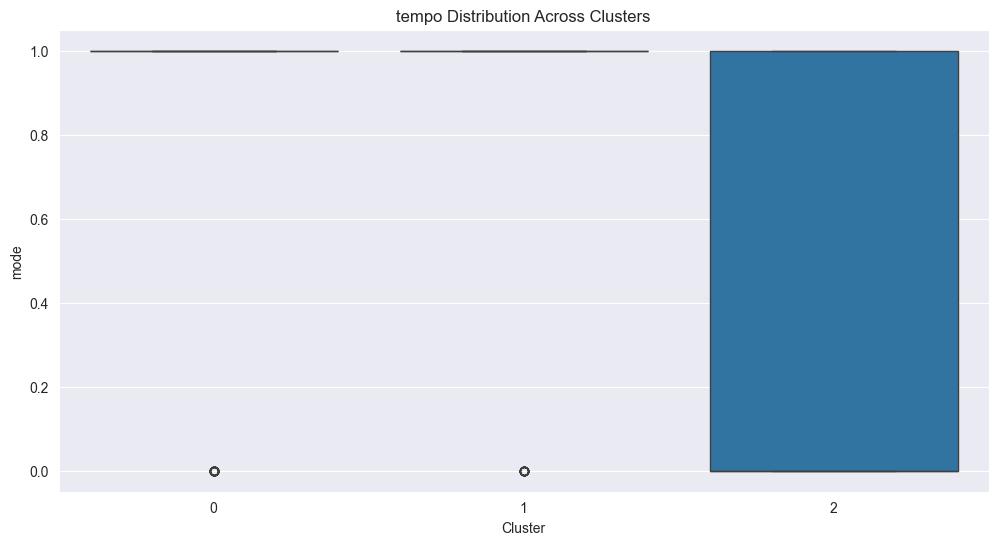

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["mode"])
plt.title("tempo Distribution Across Clusters")

Text(0.5, 1.0, 'tempo Distribution Across Clusters')

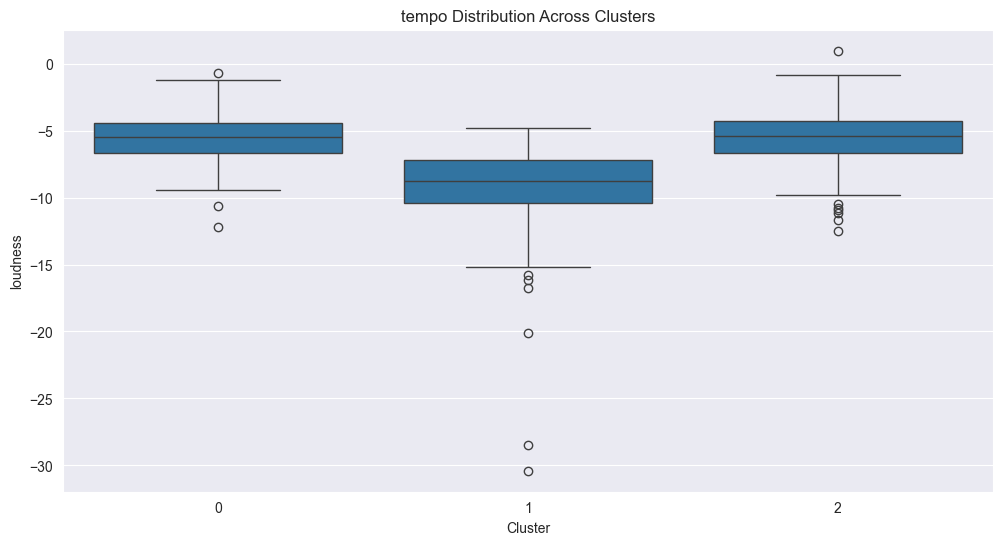

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["loudness"])
plt.title("tempo Distribution Across Clusters")

Text(0.5, 1.0, 'tempo Distribution Across Clusters')

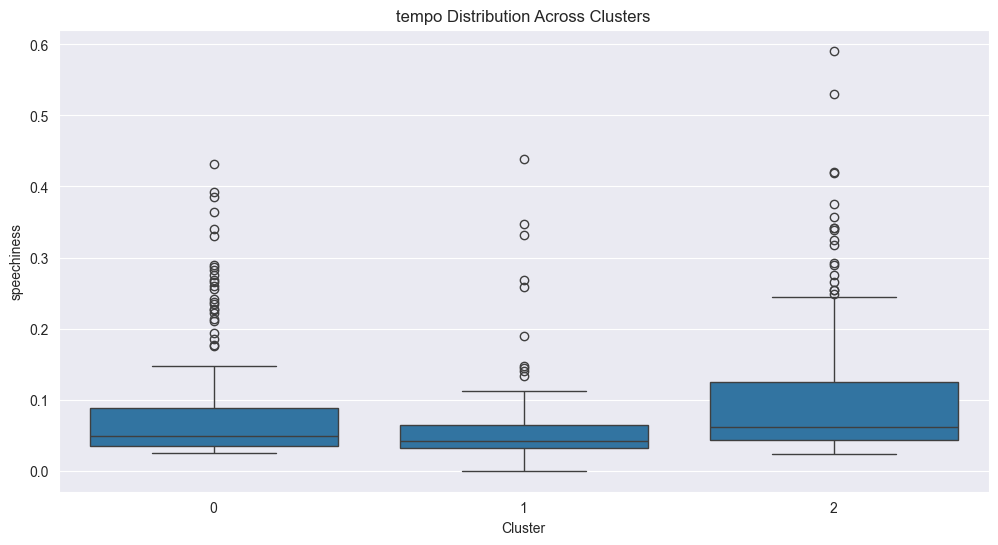

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["speechiness"])
plt.title("tempo Distribution Across Clusters")

Text(0.5, 1.0, 'tempo Distribution Across Clusters')

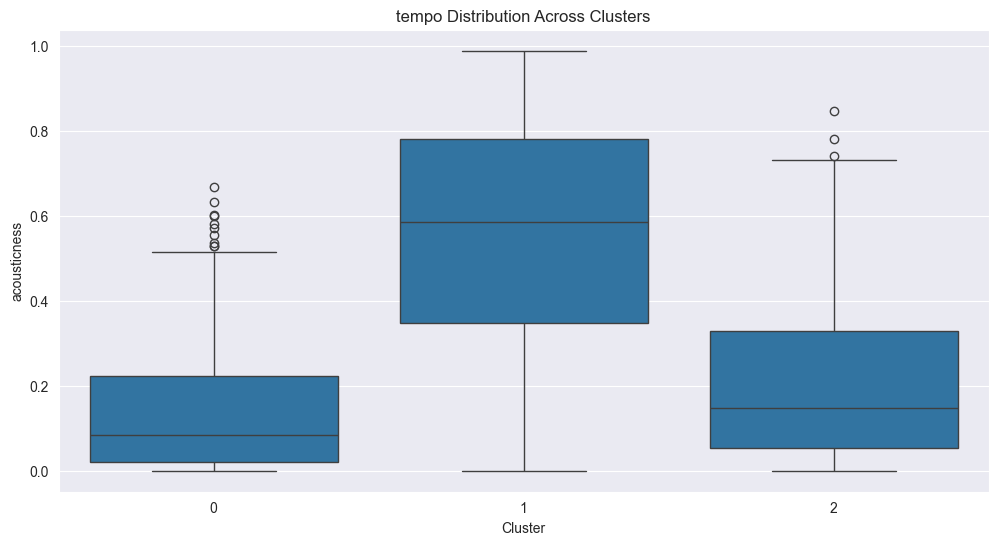

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["acousticness"])
plt.title("acousticness Distribution Across Clusters")

Text(0.5, 1.0, 'liveness Distribution Across Clusters')

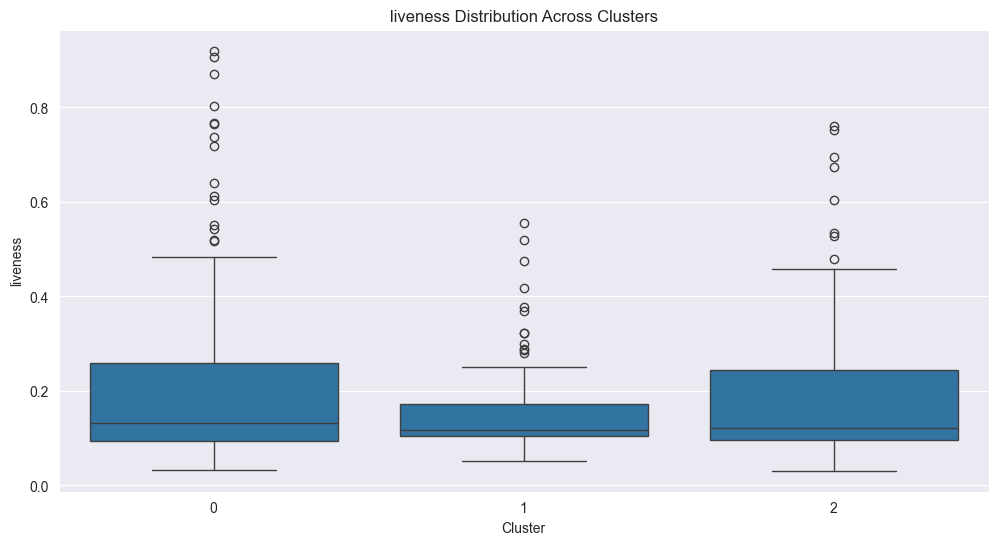

In [92]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["liveness"])
plt.title("liveness Distribution Across Clusters")

Text(0.5, 1.0, 'valence Distribution Across Clusters')

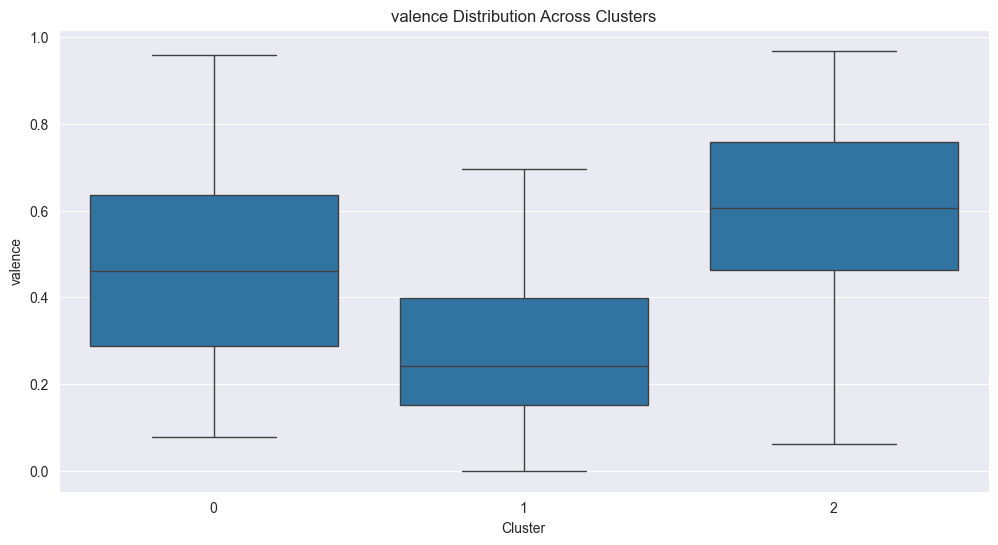

In [93]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["valence"])
plt.title("valence Distribution Across Clusters")

Text(0.5, 1.0, 'duration_ms Distribution Across Clusters')

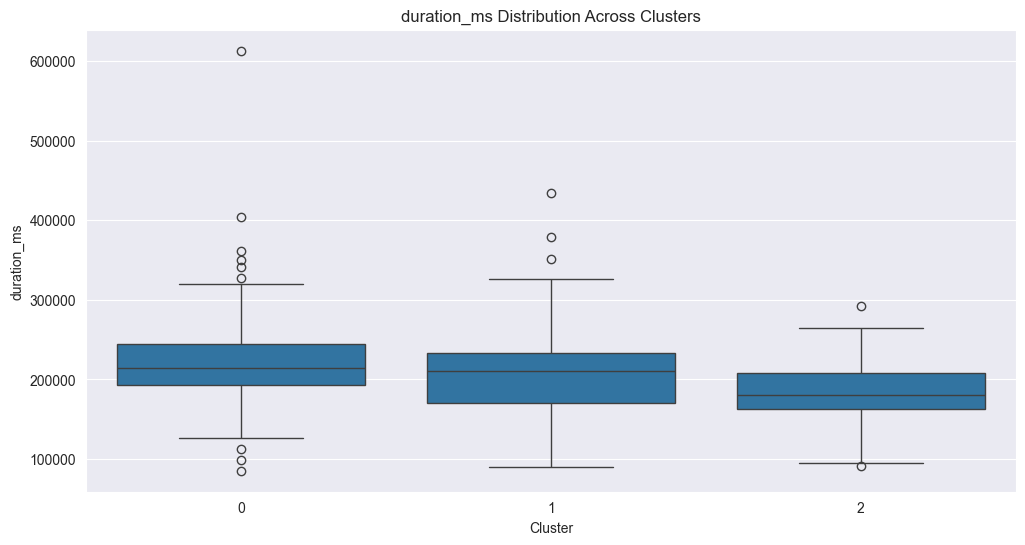

In [94]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["duration_ms"])
plt.title("duration_ms Distribution Across Clusters")

Text(0.5, 1.0, 'time_signature Distribution Across Clusters')

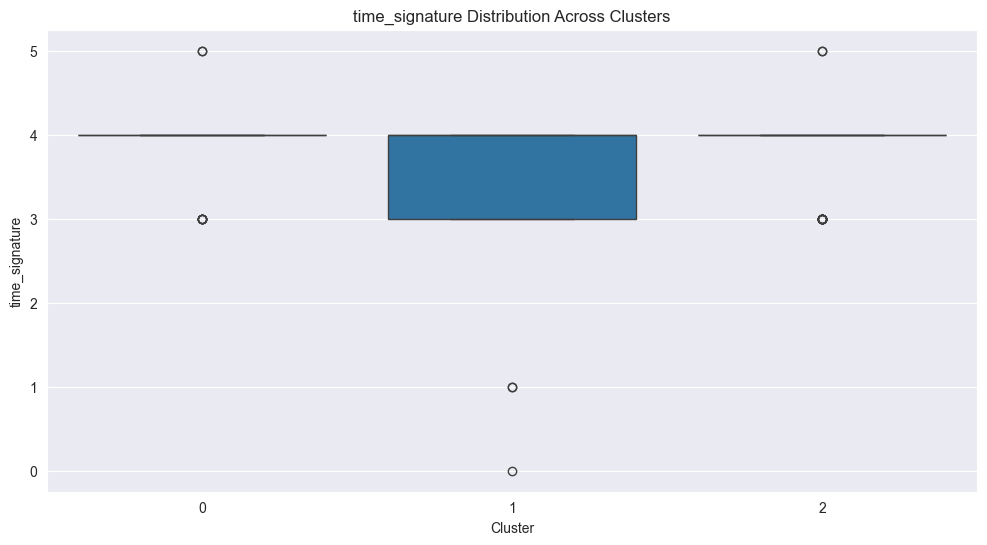

In [95]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x=sub_df["Cluster"], y=sub_df["time_signature"])
plt.title("time_signature Distribution Across Clusters")